In [28]:
%load_ext load_style
%load_style talk.css
from IPython.display import YouTubeVideo, Image

The load_style extension is already loaded. To reload it, use:
  %reload_ext load_style


# [XRAY](https://github.com/xray/xray)

[xray](https://github.com/xray/xray) has been developed by scientists / engineers working at the [Climate Corporation](http://climate.com/)

It is an open source project and Python package that aims to bring
the labeled data power of [pandas](http://pandas.pydata.org) to the
physical sciences, by providing N-dimensional variants of the core
[pandas](http://pandas.pydata.org) data structures, `Series` and
`DataFrame`: the xray `DataArray` and `Dataset`.

the goal is to provide a pandas-like and pandas-compatible toolkit for
analytics on multi-dimensional arrays, rather than the tabular data for
which pandas excels. The approach adopts the [Common Data
Model](http://www.unidata.ucar.edu/software/thredds/current/netcdf-java/CDM)
for self-describing scientific data in widespread use in the Earth
sciences (e.g., [netCDF](http://www.unidata.ucar.edu/software/netcdf)
and [OPeNDAP](http://www.opendap.org/)): `xray.Dataset` is an in-memory
representation of a netCDF file.

-   HTML documentation: <http://xray.readthedocs.org>: **really good doc !**
-   Source code: <http://github.com/xray/xray>

The main advantages of using [xray](https://github.com/xray/xray) versus [netCDF4](https://github.com/Unidata/netcdf4-python) are: 

+ intelligent selection along **labelled dimensions** (and also indexes)
+ **groupby** operations ! 
+ data alignment 
+ IO (netcdf)
+ conversion from / to [Pandas.DataFrames](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html)

What is missing IMHO: 

*+ Multiple File Datasets (see netCDF4 [MFDataset](http://netcdf4-python.googlecode.com/svn/trunk/docs/netCDF4.MFDataset-class.html))*

<font color='red'><b>UPDATE !</b> (Thanks Stephan Hoyer!) you can open multiple files Datasets using `glob` and the `concat` method</font>: 

```python
import glob
import xray 

files = sorted(glob.glob('/Users/nicolasf/data/NCEP1/PAC/hgt.????.nc'))

ds = xray.concat([xray.open_dataset(f) for f in files], 'time')
```

You can now use the `sel` method to select slices along e.g. the time dimension: 

```python 

ds.sel(time=slice('1980','2000'))

```


There's too much to see in the context of this talk, to know more about all the cool **xray** features, watch: 

PyData talk by **Stefan Hoyer**: <https://www.youtube.com/watch?v=T5CZyNwBa9c>

In [29]:
YouTubeVideo('T5CZyNwBa9c', width=500, height=400, start=0)

## Some examples

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt

In [31]:
import os
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap as bm

In [32]:
import xray; print(xray.__version__)

0.4.1-2-gaaf9067


### Open a netcdf file (ERSST Version 4)

In [33]:
dset = xray.open_dataset(os.path.join(os.environ['HOME'], 'data/SST/ER_SST/V4',\
                                      'ersst.realtime.nc'))

dset is a [xray.Dataset](http://xray.readthedocs.org/en/stable/data-structures.html#dataset), It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.

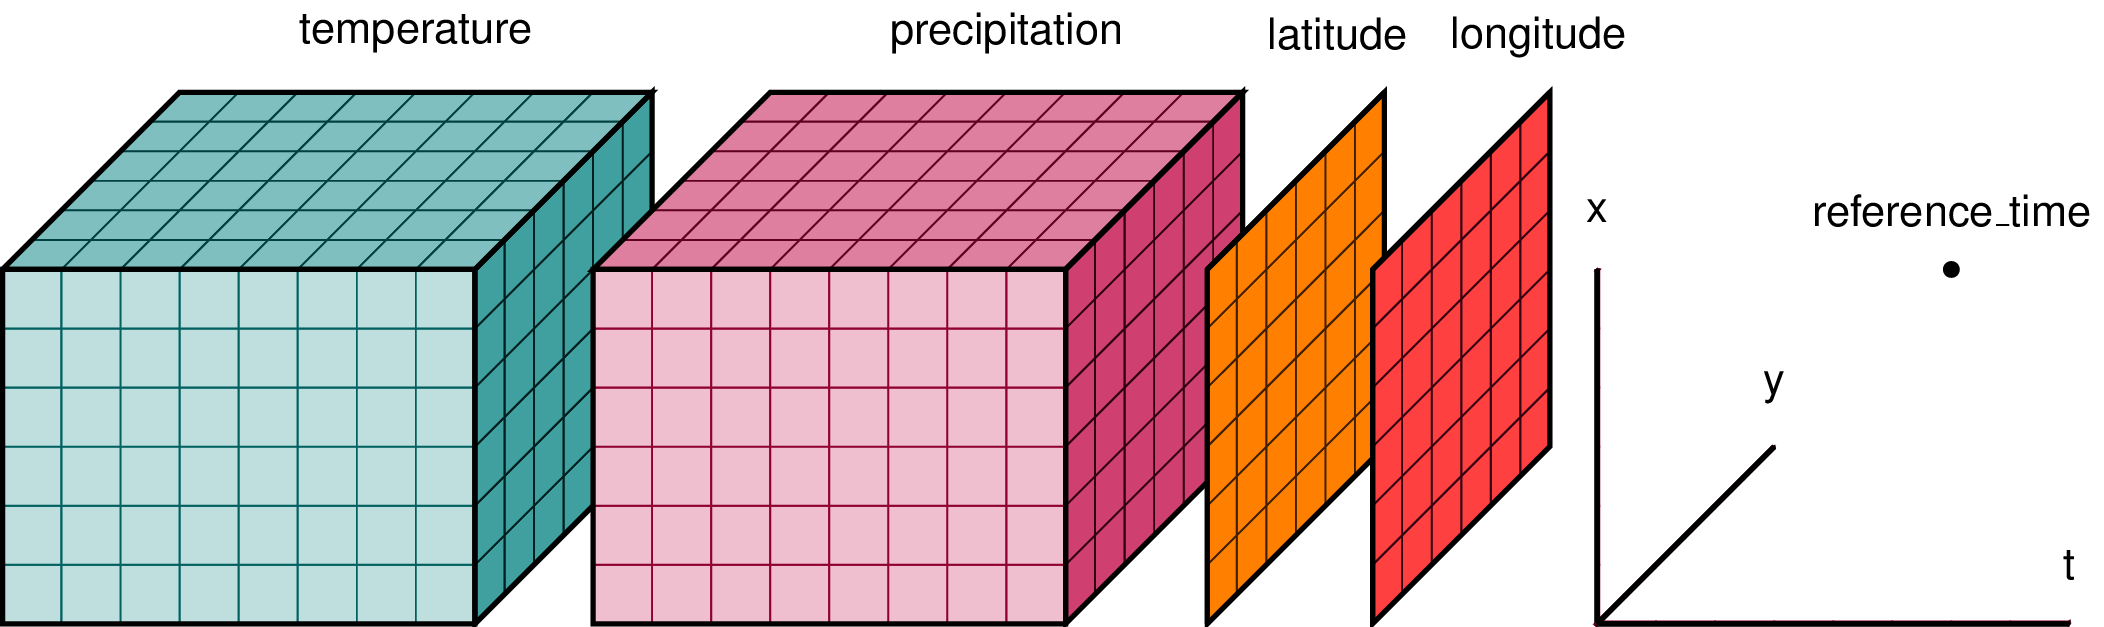

In [34]:
Image('http://xray.readthedocs.org/en/stable/_images/dataset-diagram.png', width=900)

In [35]:
dset

<xray.Dataset>
Dimensions:   (lat: 89, lon: 180, nv: 2, time: 804, zlev: 1)
Coordinates:
  * time      (time) datetime64[ns] 1948-01-15 1948-02-15 1948-03-15 1948-04-15 ...
  * zlev      (zlev) float32 0.0
  * lat       (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 -72.0 -70.0 ...
  * lon       (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 22.0 24.0 ...
  * nv        (nv) int64 0 1
Data variables:
    lat_bnds  (lat, nv) float32 -89.0 -87.0 -87.0 -85.0 -85.0 -83.0 -83.0 -81.0 -81.0 ...
    lon_bnds  (lon, nv) float32 -1.0 1.0 1.0 3.0 3.0 5.0 5.0 7.0 7.0 9.0 9.0 11.0 11.0 ...
    sst       (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...
    anom      (time, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions: CF-1.6
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0
    metadata_link: C00884
    id: ersst.v4.194801
    naming_authority: gov.noaa.ncdc
    title: 

In [36]:
dset.dims.keys()

[u'lat', u'lon', u'nv', u'time', u'zlev']

In [37]:
dset.dims

Frozen(SortedKeysDict({u'lat': 89, u'zlev': 1, u'lon': 180, u'nv': 2, u'time': 804}))

In [38]:
dset.attrs.keys()

[u'Conventions',
 u'Metadata_Conventions',
 u'metadata_link',
 u'id',
 u'naming_authority',
 u'title',
 u'summary',
 u'institution',
 u'creator_name',
 u'creator_email',
 u'date_created',
 u'production_version',
 u'history',
 u'publisher_name',
 u'publisher_email',
 u'publisher_url',
 u'creator_url',
 u'license',
 u'time_coverage_start',
 u'time_coverage_end',
 u'geospatial_lon_min',
 u'geospatial_lon_max',
 u'geospatial_lat_min',
 u'geospatial_lat_max',
 u'geospatial_lat_units',
 u'geospatial_lat_resolution',
 u'geospatial_lon_units',
 u'geospatial_lon_resolution',
 u'spatial_resolution',
 u'cdm_data_type',
 u'processing_level',
 u'standard_name_vocabulary',
 u'keywords',
 u'keywords_vocabulary',
 u'project',
 u'platform',
 u'instrument',
 u'source',
 u'comment',
 u'references',
 u'climatology',
 u'description',
 u'nco_openmp_thread_number']

In [39]:
dset.keys()

[u'time',
 u'zlev',
 u'lat',
 u'lon',
 u'lat_bnds',
 u'lon_bnds',
 u'sst',
 u'anom',
 u'nv']

### accessing variables

In [40]:
lat = dset['lat']
lon = dset['lon']
lons, lats = np.meshgrid(lon, lat)

### selecting a Dataset along dimensions

In [41]:
dset.sel(time=('1998-1-15'), zlev=0)

<xray.Dataset>
Dimensions:   (lat: 89, lon: 180, nv: 2)
Coordinates:
    time      datetime64[ns] 1998-01-15
    zlev      float32 0.0
  * lat       (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 -72.0 -70.0 ...
  * lon       (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 22.0 24.0 ...
  * nv        (nv) int64 0 1
Data variables:
    lat_bnds  (lat, nv) float32 -89.0 -87.0 -87.0 -85.0 -85.0 -83.0 -83.0 -81.0 -81.0 ...
    lon_bnds  (lon, nv) float32 -1.0 1.0 1.0 3.0 3.0 5.0 5.0 7.0 7.0 9.0 9.0 11.0 11.0 ...
    sst       (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan nan nan nan ...
    anom      (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions: CF-1.6
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0
    metadata_link: C00884
    id: ersst.v4.194801
    naming_authority: gov.noaa.ncdc
    title: NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 

In [42]:
dset.sel(time=('1998-1-15'), zlev=0, lat=slice(-40,40))

<xray.Dataset>
Dimensions:   (lat: 41, lon: 180, nv: 2)
Coordinates:
    time      datetime64[ns] 1998-01-15
    zlev      float32 0.0
  * lat       (lat) float32 -40.0 -38.0 -36.0 -34.0 -32.0 -30.0 -28.0 -26.0 -24.0 -22.0 ...
  * lon       (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 22.0 24.0 ...
  * nv        (nv) int64 0 1
Data variables:
    lat_bnds  (lat, nv) float32 -41.0 -39.0 -39.0 -37.0 -37.0 -35.0 -35.0 -33.0 -33.0 ...
    lon_bnds  (lon, nv) float32 -1.0 1.0 1.0 3.0 3.0 5.0 5.0 7.0 7.0 9.0 9.0 11.0 11.0 ...
    sst       (lat, lon) float64 13.86 13.84 13.86 13.89 14.05 14.41 15.14 16.21 17.33 ...
    anom      (lat, lon) float64 -0.44 -0.44 -0.42 -0.44 -0.4 -0.38 -0.36 -0.32 -0.29 ...
Attributes:
    Conventions: CF-1.6
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0
    metadata_link: C00884
    id: ersst.v4.194801
    naming_authority: gov.noaa.ncdc
    title: NOAA Extended Reconstructed Sea Surface Temperature (ERSST), Version 4 (in s

#### defines the Basemap projection

In [43]:
m = bm(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=0,urcrnrlon=360,\
            lat_ts=0,resolution='c')

#### defines a function to plot a field (must be 2D)

In [44]:
def plot_field(X, lat, lon, vmin, vmax, step, cmap=plt.get_cmap('jet'), ax=False, title=False, grid=False):
    if not ax: 
        f, ax = plt.subplots(figsize=(10, (X.shape[0] / float(X.shape[1])) * 10))
    m.ax = ax
    im = m.contourf(lons, lats, X, np.arange(vmin, vmax+step, step), latlon=True, cmap=cmap, extend='both', ax=ax)
    m.drawcoastlines()
    if grid: 
        m.drawmeridians(np.arange(0, 360, 60), labels=[0,0,0,1])
        m.drawparallels([-40, 0, 40], labels=[1,0,0,0])
    m.colorbar(im)
    if title: 
        ax.set_title(title)

#### plots 

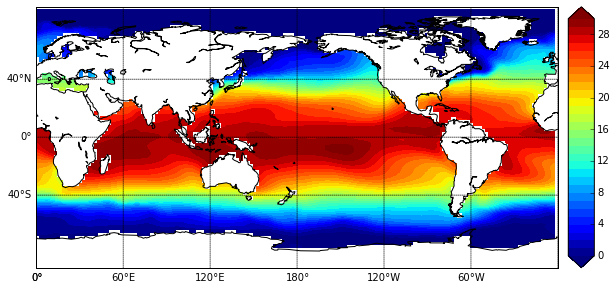

In [45]:
plot_field(dset.sel(time=('1998-1-15'), zlev=0)['sst'], lats, lons, 0, 30, 1, grid=True)

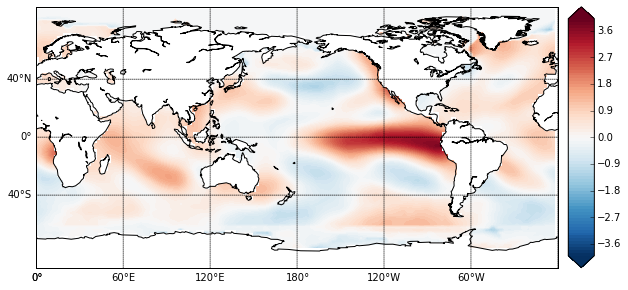

In [46]:
plot_field(dset.sel(time=('1998-1-15'), zlev=0)['anom'], lats, lons, -4, 4, 0.1, \
           cmap=plt.get_cmap('RdBu_r'), grid=True)

### calculates a monthly climatology using the groupby machinery

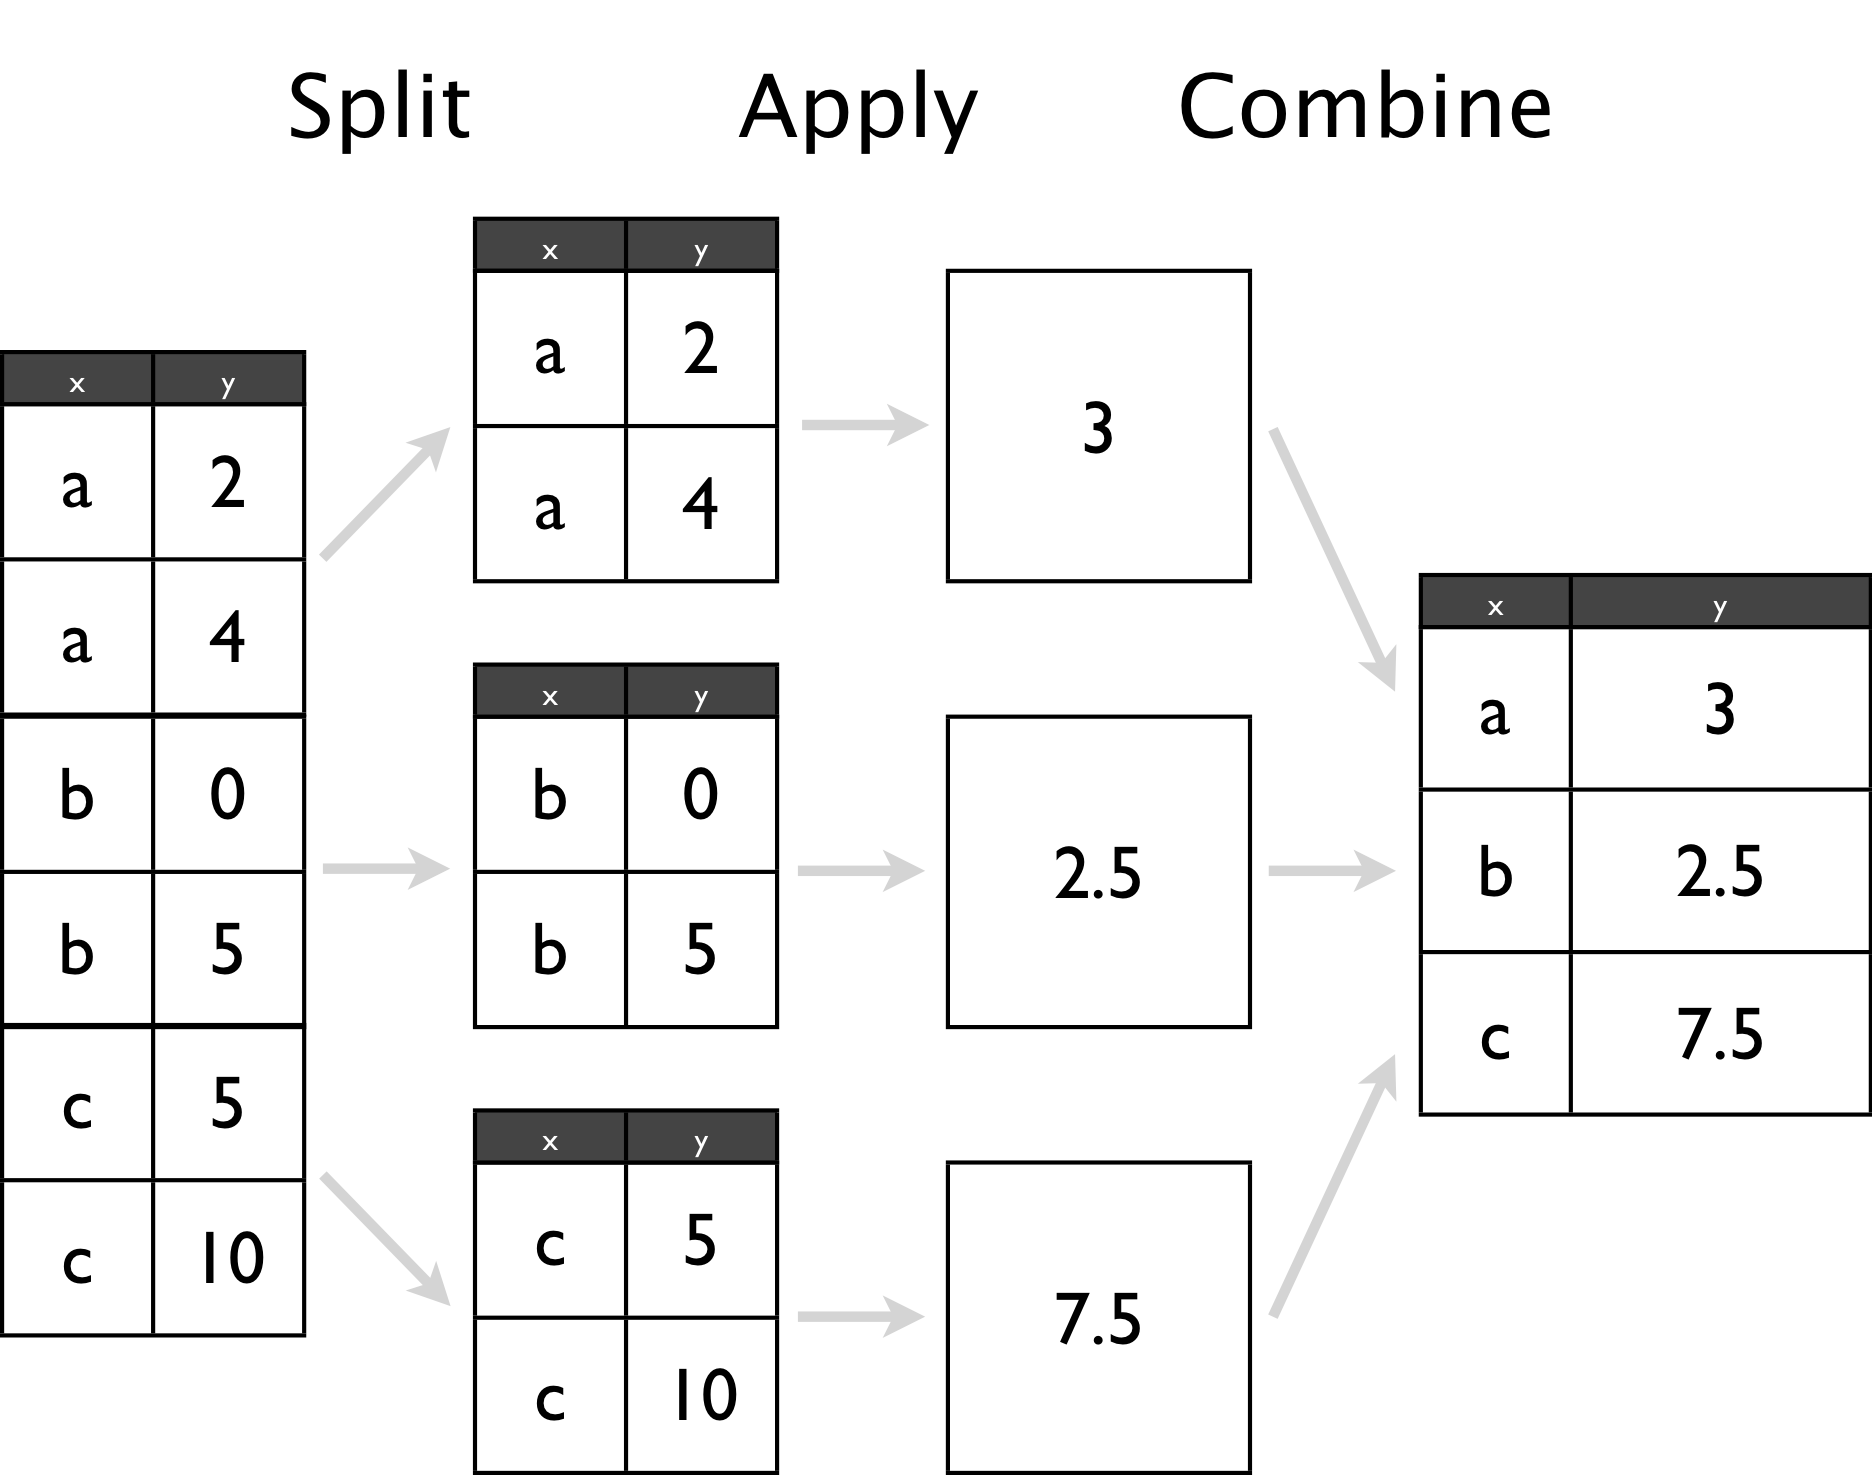

In [47]:
Image(filename='images/split-apply-combine.png', width=500)

In [48]:
sst = dset[['sst']]

In [49]:
clim = sst.groupby('time.month').mean('time')

In [50]:
clim[['sst']]

<xray.Dataset>
Dimensions:  (lat: 89, lon: 180, month: 12, zlev: 1)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 -72.0 -70.0 ...
  * zlev     (zlev) float32 0.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 22.0 24.0 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sst      (month, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...

In [51]:
from calendar import month_name

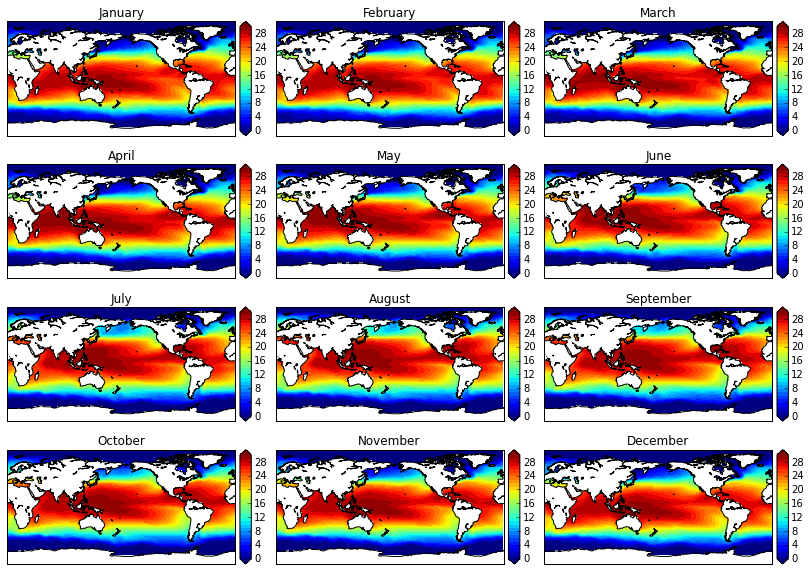

In [52]:
f, axes = plt.subplots(nrows=4,ncols=3, figsize=(14,10))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten()
for i, month in enumerate(xrange(1,13)): 
    ax = axes[i]
    plot_field(clim['sst'][i,0,:,:].values, lats, lons, 0, 30, 1, ax=ax, title=month_name[month])
f.savefig('./images/clim_sst.png')

### New in version 0.4 (RC1 at 27/02/2015): calculates a seasonal (DJF, MAM, ...) climatology

In [53]:
seas_clim = sst.groupby('time.season').mean('time')

In [54]:
seas_clim

<xray.Dataset>
Dimensions:  (lat: 89, lon: 180, season: 4, zlev: 1)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 -72.0 -70.0 ...
  * zlev     (zlev) float32 0.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 22.0 24.0 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, zlev, lat, lon) float64 nan nan nan nan nan nan nan nan nan nan nan ...

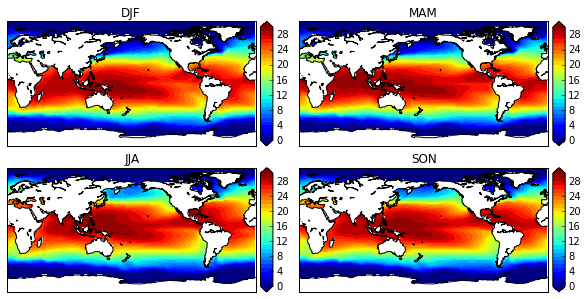

In [55]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].values): 
    ax = axes[i]
    plot_field(seas_clim['sst'][i,0,:,:].values, lats, lons, 0, 30, 1, ax=ax, title=seas)
f.savefig('./images/seas_clim_sst.png')

### calculates seasonal averages weigthed by the number of days in each month

adapted from [http://xray.readthedocs.org/en/stable/examples/monthly-means.html#monthly-means-example](http://xray.readthedocs.org/en/stable/examples/monthly-means.html#monthly-means-example)

In [56]:
def get_dpm(time):
    """
    return a array of days per month corresponding to the months provided in `months`
    """
    import calendar as cal
    month_length = np.zeros(len(time), dtype=np.float)

    for i, (month, year) in enumerate(zip(time.month, time.year)):
        month_length[i] = cal.monthrange(year, month)[1]
    return month_length

In [57]:
def season_mean(ds, calendar='standard'):
    # Make a DataArray of season/year groups
    year_season = xray.DataArray(ds.time.to_index().to_period(freq='Q-NOV').to_timestamp(how='E'),
                                 coords=[ds.time], name='year_season')

    # Make a DataArray with the number of days in each month, size = len(time)
    month_length = xray.DataArray(get_dpm(ds.time.to_index()),
                                  coords=[ds.time], name='month_length')
    # Calculate the weights by grouping by 'time.season'
    weights = month_length.groupby('time.season') / month_length.groupby('time.season').sum()

    # Test that the sum of the weights for each season is 1.0
    np.testing.assert_allclose(weights.groupby('time.season').sum().values, np.ones(4))

    # Calculate the weighted average
    return (ds * weights).groupby('time.season').sum(dim='time')

In [58]:
sst_seas = season_mean(sst)

In [59]:
sst_seas

<xray.Dataset>
Dimensions:  (lat: 89, lon: 180, season: 4, zlev: 1)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 -72.0 -70.0 ...
  * zlev     (zlev) float32 0.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 22.0 24.0 ...
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, zlev, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

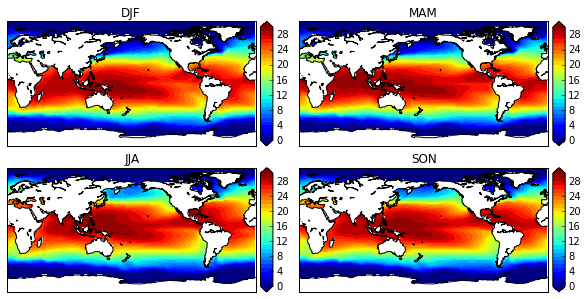

In [60]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].values): 
    ax = axes[i]
    plot_field(seas_clim['sst'][i,0,:,:].values, lats, lons, 0, 30, 1, ax=ax, title=seas)
f.savefig('./images/seas_clim_sst.png')

#### difference between non-weigthed and weighted seasonal climatologies

In [61]:
diff_seas = seas_clim - sst_seas

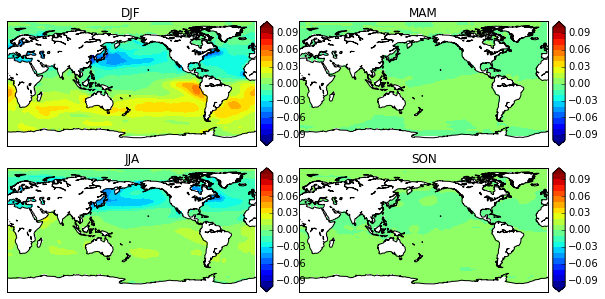

In [62]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].values): 
    ax = axes[i]
    plot_field(diff_seas['sst'][i,0,:,:].values, lats, lons, -0.1, 0.1, 0.01, ax=ax, title=seas)

### using the resampling method (new in version 0.4.1)

In [107]:
res_quarter = dset.resample('Q-FEB', dim='time', how='mean')

In [108]:
res_quarter_clim = res_quarter.groupby('time.month').mean('time')

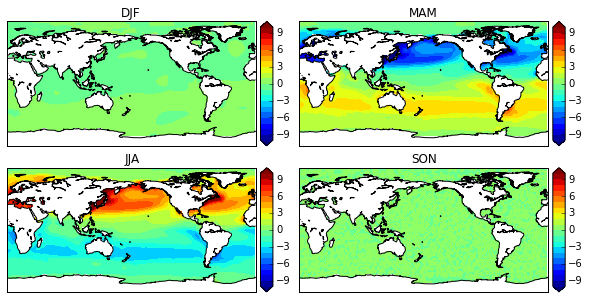

In [109]:
f, axes = plt.subplots(nrows=2,ncols=2, figsize=(10,5))
f.subplots_adjust(hspace=0.1, wspace=0.1)
axes = axes.flatten('F')
for i, seas in enumerate(seas_clim['season'].values): 
    ax = axes[i]
    plot_field(seas_clim['sst'][i,0,:,:].values - res_quarter_clim['sst'][i,0,:,:].values, \
               lats, lons, -10, 10, 1, ax=ax, title=seas)

something not right here, probably because a *Quarter* is not what I think it is ... 

### calculates anomalies with respect to a specific climatological *normal*

#### 1. defines the function

In [25]:
def demean(x): 
    return x - x.sel(time=slice('1981-1-15','2010-12-15')).mean('time')

#### 2. apply the function to the groupby object

In [28]:
sst_anoms = dset.groupby('time.month').apply(demean)

# or (will return a xray.DataArray)

# sst_anoms = dset['sst'].groupby('time.month').apply(demean) 

In [ ]:
sst_anoms

#### should be very similar to the original anomalies

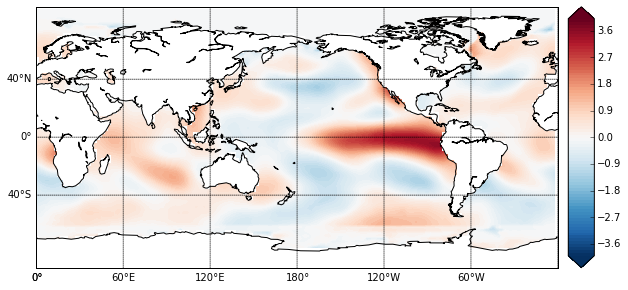

In [30]:
plot_field(sst_anoms.sel(time=('1998-1-15'), zlev=0)['sst'], lats, lons, -4, 4, 0.1, \
           cmap=plt.get_cmap('RdBu_r'), grid=True)

### dumps a xray.Dataset object into a netcdf (Version 4) file (note: does not work for a xray.DataArray object)

In [31]:
sst_anoms.to_netcdf('../data/ersst_anoms.nc')

In [ ]:
!ncdump -h ../data/ersst_anoms.nc

### Creates a xray dataset object from numpy arrays

In [33]:
lon = np.linspace(0, 357.5, 144, endpoint=True)
lat = np.linspace(-90,90, 73, endpoint=True)

lons, lats = np.meshgrid(lon,lat)

lev = np.array([1000,925,850])
time = pd.date_range(start='2015-1-1',end='2015-1-3')

In [34]:
arr = np.random.randn(3,3,73,144)

The dictionnary **keys** are the **variables** contained in the Dataset.<br><br>
The Dictionnary **values** are **tuples**, with first the (or the list of) dimension(s) over which the array varies, then the array itself

In [35]:
d = {}
d['time'] = ('time',time)
d['latitudes'] = ('latitudes',lat)
d['longitudes'] = ('longitudes', lon)
d['level'] = ('level', lev)
d['dummy'] = (['time','level','latitudes','longitudes'], arr)

In [36]:
dset = xray.Dataset(d)

In [37]:
dset

<xray.Dataset>
Dimensions:     (latitudes: 73, level: 3, longitudes: 144, time: 3)
Coordinates:
  * latitudes   (latitudes) float64 -90.0 -87.5 -85.0 -82.5 -80.0 -77.5 -75.0 -72.5 -70.0 ...
  * level       (level) int64 1000 925 850
  * longitudes  (longitudes) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 25.0 ...
  * time        (time) datetime64[ns] 2015-01-01 2015-01-02 2015-01-03
Data variables:
    dummy       (time, level, latitudes, longitudes) float64 0.9362 -0.2443 -0.9711 ...

In [38]:
dset.sel(time='2015-1-2', level=1000)

<xray.Dataset>
Dimensions:     (latitudes: 73, longitudes: 144)
Coordinates:
  * latitudes   (latitudes) float64 -90.0 -87.5 -85.0 -82.5 -80.0 -77.5 -75.0 -72.5 -70.0 ...
    level       int64 1000
  * longitudes  (longitudes) float64 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 25.0 ...
    time        datetime64[ns] 2015-01-02
Data variables:
    dummy       (latitudes, longitudes) float64 -0.8486 0.3278 1.318 -0.3273 0.3071 ...

In [39]:
lons, lats = np.meshgrid(dset['longitudes'], dset['latitudes'])

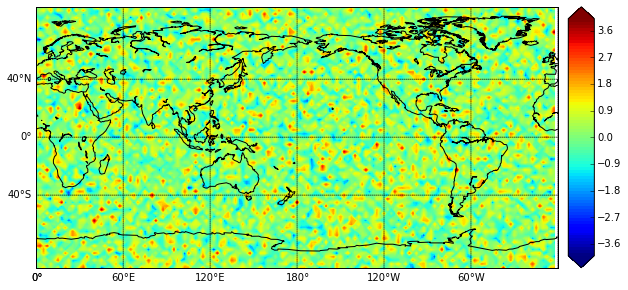

In [40]:
plot_field(dset.sel(time='2015-1-2', level=1000)['dummy'], \
           lats, lons, -4, 4, 0.1, grid=True)

In [42]:
dset.to_netcdf('../outputs/dset_from_dict.nc')

In [43]:
!ncdump -h ../outputs/dset_from_dict.nc

netcdf dset_from_dict {
dimensions:
	time = 3 ;
	level = 3 ;
	latitudes = 73 ;
	longitudes = 144 ;
variables:
	double dummy(time, level, latitudes, longitudes) ;
	double latitudes(latitudes) ;
	double time(time) ;
		time:units = "days since 2015-01-01 00:00:00" ;
		time:calendar = "proleptic_gregorian" ;
	double longitudes(longitudes) ;
	int64 level(level) ;
}


### Creates a xray dataset object from a Pandas DataFrame

In [ ]:
import string
df = pd.DataFrame(np.random.randn(365,5), \
                  index=pd.date_range(start='2014-1-1', periods=365), \
                  columns=list(string.ascii_letters[:5]))

In [ ]:
df.head()

#### from DataFrame

In [ ]:
df_ds = xray.Dataset.from_dataframe(df)

In [ ]:
df_ds

In [ ]:
group = df_ds.groupby('index.month').mean('index')

In [ ]:
group

#### converts TO a Pandas.DataFrame

In [ ]:
group_df = group.to_dataframe()

In [ ]:
group_df.reindex_axis(list(string.ascii_letters[:5]), axis=1).head()

In [ ]:
df.groupby(df.index.month).mean().head()

### Opening a file throught the network with openDAP

In [32]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/interp_OLR/olr.day.mean.nc'

In [33]:
olr_dset = xray.open_dataset(url)

In [34]:
olr_dset

<xray.Dataset>
Dimensions:  (lat: 73, lon: 144, nmiss: 7, time: 14459)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 25.0 27.5 30.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 65.0 62.5 ...
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 1974-06-03 1974-06-04 ...
  * nmiss    (nmiss) int64 0 1 2 3 4 5 6
Data variables:
    info     (time, nmiss) float64 ...
    olr      (time, lat, lon) float64 ...
Attributes:
    title: Daily Mean Interpolated OLR
    history: Tue May 10 11:37:33 2005: ncatted -a missing_value,info,o,s,32766 /Datasets/interp_OLR/olr.day.mean.nc
/home/hoop/crdc/oldCRDC2COARDSv3/oldCRDC2COARDS Sat Dec  9 01:36:34 1995 from olr.7494.nc
created 08/24/94 by C. Smith (netCDF2.3)
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily
    platform: Observation
    Conventions: COARDS
    reference: Liebmann and Smith (Bulletin of t

#### the dataset is not loaded in memory until one _selects_ something

In [35]:
olr_sub = olr_dset.sel(time='1998-1-1',lat=slice(30,-30), lon=slice(170, 300))

In [36]:
olr_sub

<xray.Dataset>
Dimensions:  (lat: 25, lon: 53, nmiss: 7)
Coordinates:
  * lon      (lon) float32 170.0 172.5 175.0 177.5 180.0 182.5 185.0 187.5 190.0 192.5 ...
  * lat      (lat) float32 30.0 27.5 25.0 22.5 20.0 17.5 15.0 12.5 10.0 7.5 5.0 2.5 0.0 ...
    time     datetime64[ns] 1998-01-01
  * nmiss    (nmiss) int64 0 1 2 3 4 5 6
Data variables:
    info     (nmiss) float64 1.0 93.0 92.0 363.0 293.0 24.0 31.0
    olr      (lat, lon) float64 252.0 234.0 229.5 220.1 200.5 210.0 237.5 243.4 256.5 ...
Attributes:
    title: Daily Mean Interpolated OLR
    history: Tue May 10 11:37:33 2005: ncatted -a missing_value,info,o,s,32766 /Datasets/interp_OLR/olr.day.mean.nc
/home/hoop/crdc/oldCRDC2COARDSv3/oldCRDC2COARDS Sat Dec  9 01:36:34 1995 from olr.7494.nc
created 08/24/94 by C. Smith (netCDF2.3)
    description: Data is interpolated in time and space from NOAA twice-daily OLR values and averaged to once daily
    platform: Observation
    Conventions: COARDS
    reference: Liebmann and Smit

In [37]:
m = bm(projection='merc',llcrnrlat=-30,urcrnrlat=30,\
            llcrnrlon=170,urcrnrlon=300,\
            lat_ts=0,resolution='c')

In [38]:
lons, lats = np.meshgrid(olr_sub['lon'], olr_sub['lat'])

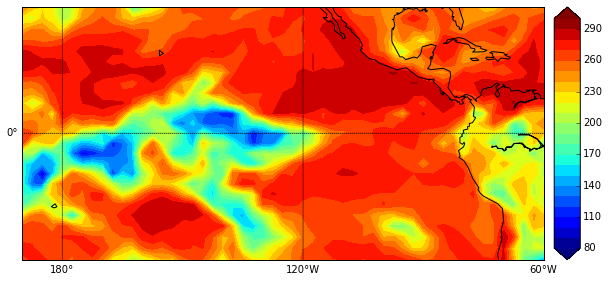

In [39]:
plot_field(olr_sub['olr'].values, lats, lons, 80, 300, 10, grid=True)